# Рынок заведений общественного питания Москвы

# План исследования:

# Шаг №1. Загрузим данные и подготовим их к анализу.

# Шаг №2. Анализ данных.

- Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

- Исследуйем соотношение сетевых и несетевых заведений по количеству. Построим график.

- Выясним ,для какого вида объекта общественного питания характерно сетевое распространение.

- Выясним, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

- Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Выясним, какой вид предоставляет в среднем самое большое количество посадочных мест. Построим графики.

- Выделим в отдельный столбец информацию об улице.

- Построим график топ-10 улиц по количеству объектов общественного питания.

- Найдем число улиц с одним объектом общественного питания.

# Шаг №3. Подготовим презентацию.


# Описание данных

# Таблица rest_data:

- id — идентификатор объекта;

- object_name — название объекта общественного питания;

- chain — сетевой ресторан;

- object_type — тип объекта общественного питания;

- address — адрес;

- number — количество посадочных мест.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import requests
import plotly.express as px

import scipy.stats as stats
from scipy import stats as st
from pandas.io.json import json_normalize
from pprint import pprint
import json


import math
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_csv('/datasets/rest_data.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
df.head()


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [7]:
df = df.rename(columns={'number':'number_of_seats'})

In [8]:
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
df['address'] = df['address'].str.replace('ё','е')

/tmp/ipykernel_31/3356988956.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')


In [9]:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()

***Заменили длинные слова на более короткие,привели к нижнему регистру***



In [10]:
df.isna().sum()

id                 0
object_name        0
chain              0
object_type        0
address            0
number_of_seats    0
dtype: int64

In [11]:
df.duplicated().sum()

0

***Дубликатов и пропусков нет.***


 #  Исследуем соотношение видов объектов общественного питания по     количеству. Построим график.

In [12]:
df.groupby('object_type')['object_type'].count()

object_type
бар            856
буфет          585
закусочная     360
кафе          6099
кафетерий      398
кулинария      273
ресторан      2285
столовая      2587
фаст-фуд      1923
Name: object_type, dtype: int64

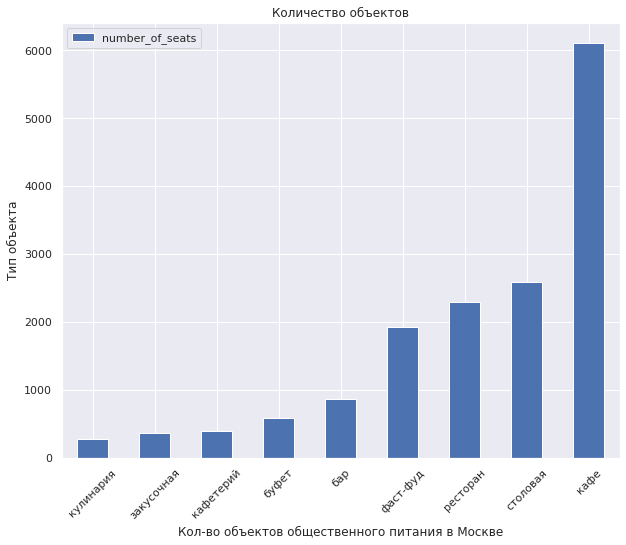

In [13]:
temp = df.groupby('object_type').count().reset_index()
ax = temp[['object_type', 'number_of_seats']].set_index('object_type').sort_values('number_of_seats', ascending=True).plot(kind='bar')
ax.set_xlabel('Кол-во объектов общественного питания в Москве')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество объектов')
plt.xticks(rotation=45)
plt.show()

***Из видов общественного питания лидирует с большим отрывом - кафе, затем уже идут столовые, рестораны и фаст-фуд.***

In [14]:
temp[['object_type', 'number_of_seats']].sort_values(by='number_of_seats').rename(columns={'number_of_seats': 'total_seats'})


,object_type,total_seats
5,кулинария,273
2,закусочная,360
4,кафетерий,398
1,буфет,585
0,бар,856
8,фаст-фуд,1923
6,ресторан,2285
7,столовая,2587
3,кафе,6099


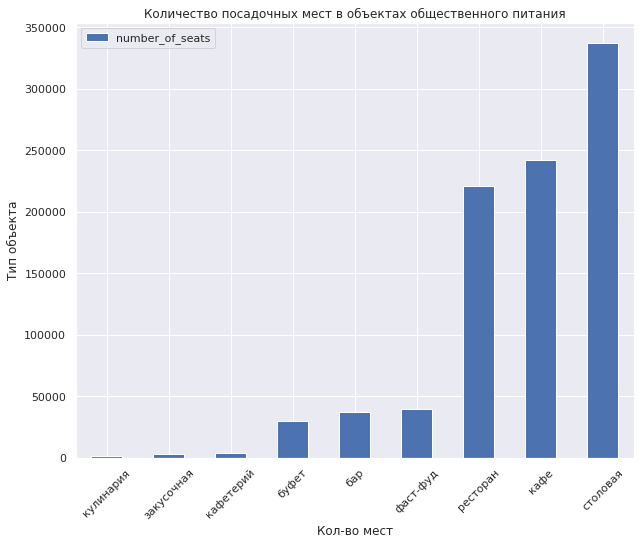

In [15]:
temp = df.groupby('object_type').sum().reset_index()
ax = temp[['object_type', 'number_of_seats']].set_index('object_type').sort_values('number_of_seats', ascending=True).plot(kind='bar')
ax.set_xlabel('Кол-во мест')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество посадочных мест в объектах общественного питания')
plt.xticks(rotation=45)
plt.show()

# Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

In [16]:
df.groupby('chain')['chain'].count().sort_values()

chain
сетевое       2968
несетевое    12398
Name: chain, dtype: int64

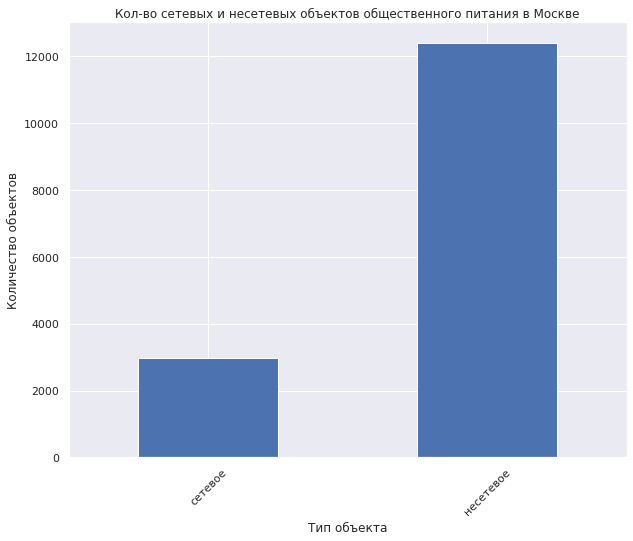

In [17]:
ax = df.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
ax.set_title('Кол-во сетевых и несетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

***Сетевых в разы меньше. В 4 раза***




In [18]:
net = 'сетевое'

In [19]:
temp = df.query('chain == @net')

In [20]:
net_is = temp['object_type'].unique().tolist()
net_is

['кафе',
 'фаст-фуд',
 'ресторан',
 'кулинария',
 'кафетерий',
 'закусочная',
 'бар',
 'буфет',
 'столовая']

In [21]:
df['s_chain'] = temp['chain']

In [22]:
chain_object = df.groupby('object_type').agg({'chain': 'count', 's_chain': 'count'})
chain_object

,chain,s_chain
object_type,,
бар,856,37
буфет,585,11
закусочная,360,56
кафе,6099,1396
кафетерий,398,52
кулинария,273,78
ресторан,2285,544
столовая,2587,3
фаст-фуд,1923,791


In [23]:
chain_object['percents'] = chain_object['s_chain'] / chain_object['chain'] * 100

In [24]:
chain_object.sort_values('percents',ascending = False)

,chain,s_chain,percents
object_type,,,
фаст-фуд,1923,791,41.13
кулинария,273,78,28.57
ресторан,2285,544,23.81
кафе,6099,1396,22.89
закусочная,360,56,15.56
кафетерий,398,52,13.07
бар,856,37,4.32
буфет,585,11,1.88
столовая,2587,3,0.12


In [25]:
chain_object['object'] = ['бар', 'буфет', 'закусочная', 'кафе', 'кафетерий', 'кулинария', 'ресторан', 'столовая', 'фаст-фуд']

In [26]:
chain_object

,chain,s_chain,percents,object
object_type,,,,
бар,856,37,4.32,бар
буфет,585,11,1.88,буфет
закусочная,360,56,15.56,закусочная
кафе,6099,1396,22.89,кафе
кафетерий,398,52,13.07,кафетерий
кулинария,273,78,28.57,кулинария
ресторан,2285,544,23.81,ресторан
столовая,2587,3,0.12,столовая
фаст-фуд,1923,791,41.13,фаст-фуд


<AxesSubplot:xlabel='object', ylabel='percents'>

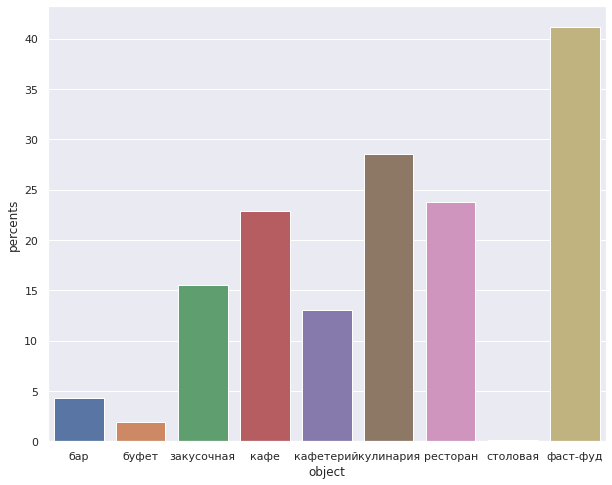

In [27]:
sns.barplot(x='object', y='percents', data = chain_object) 

***Больше всего сетевиков из обьектов общественного питания характерны для кафе, их 1396,но доля от общего количества всего 23 процента, доля у фаст-фуда 41 процент и количество их тоже не малое 791, в ресторанах доля сетевых заведений от общего числа состовляет 24 процента. Сетевое распростронение больше всего развито у фаст-фуда.***




# Выясним, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

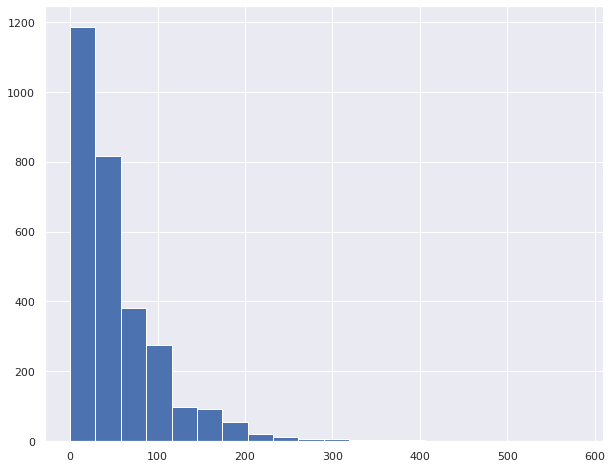

In [28]:
temp['number_of_seats'].hist(bins=20)
plt.show()


In [29]:
median_seats = temp.groupby('object_name').agg({'number_of_seats': 'mean', 'id': 'count'})
median_seats

,number_of_seats,id
object_name,,
beverly hills diner,88.00,1
bierloga,75.00,1
black & white,40.00,1
bocconcino,66.67,3
boobo,46.00,1
...,...,...
ямми микс,2.00,1
ян примус,300.00,1
японский ресторан «ваби-саби»,155.00,1


In [30]:
trew = df[df['chain'] == 'сетевое'].groupby('object_name').agg({'id':'count', 'number_of_seats':'mean'})
trew

,id,number_of_seats
object_name,,
beverly hills diner,1,88.00
bierloga,1,75.00
black & white,1,40.00
bocconcino,3,66.67
boobo,1,46.00
...,...,...
ямми микс,1,2.00
ян примус,1,300.00
японский ресторан «ваби-саби»,1,155.00


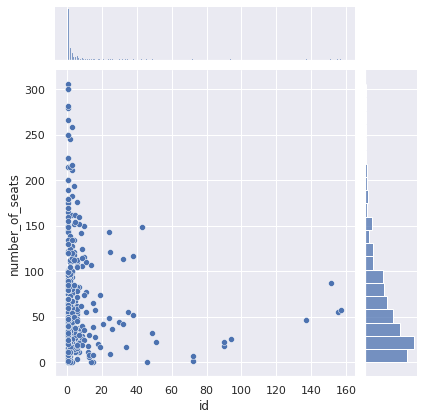

In [31]:
sns.jointplot(x='id', y='number_of_seats', data=median_seats) 
plt.show()

In [31]:
temp['number_of_seats'].describe()

count   2,968.00
mean       52.92
std        57.14
min         0.00
25%        15.00
50%        40.00
75%        72.00
max       580.00
Name: number_of_seats, dtype: float64

***Много заведений и мало мест***

# Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Выясним, какой вид предоставляет в среднем самое большое количество посадочных мест. Построим графики.

In [32]:
df.groupby('object_type')['number_of_seats'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
закусочная,360.00,7.61,16.65,0.00,0.00,0.00,10.00,216.00
кулинария,273.00,5.59,9.87,0.00,0.00,0.00,8.00,50.00
фаст-фуд,"1,923.00",20.55,38.37,0.00,0.00,5.00,25.00,580.00
кафетерий,398.00,9.12,14.64,0.00,0.00,6.00,12.00,200.00
кафе,"6,099.00",39.72,37.72,0.00,15.00,30.00,50.00,533.00
буфет,585.00,51.13,56.33,0.00,14.00,32.00,80.00,320.00
бар,856.00,43.49,67.08,0.00,20.00,35.00,50.00,"1,700.00"
ресторан,"2,285.00",96.83,94.76,0.00,46.00,80.00,114.00,"1,500.00"
столовая,"2,587.00",130.25,95.18,0.00,50.00,103.00,200.00,"1,400.00"


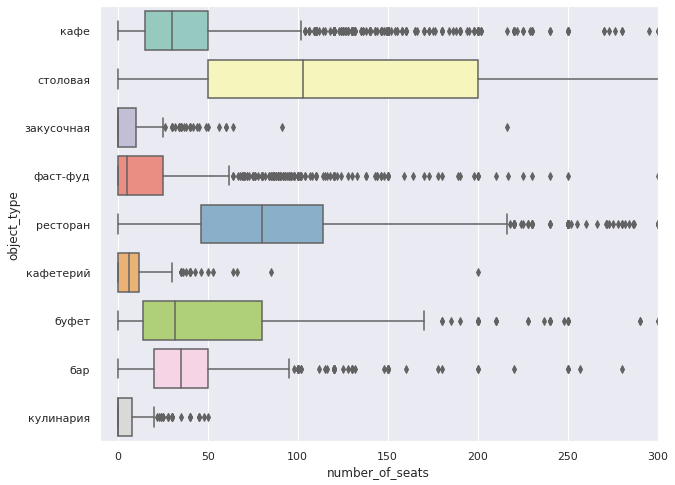

In [33]:
ax = sns.boxplot(x='number_of_seats', y='object_type', data=df, palette="Set3")
ax.set_xlim(-10,300)
plt.show()

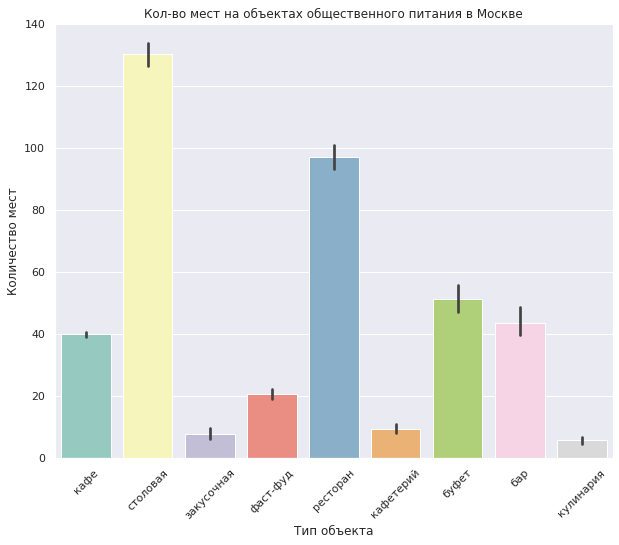

In [34]:
ax = sns.barplot(x='object_type', y='number_of_seats', data=df, palette="Set3")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

***По совместным показателям и сетевым и несетевым:***

- У столовой по средним показателям больше всего посадочных мест(около 130);
- У ресторанов (около 100);
- У буфета 50; 
- В остальных объектах меньше 50.

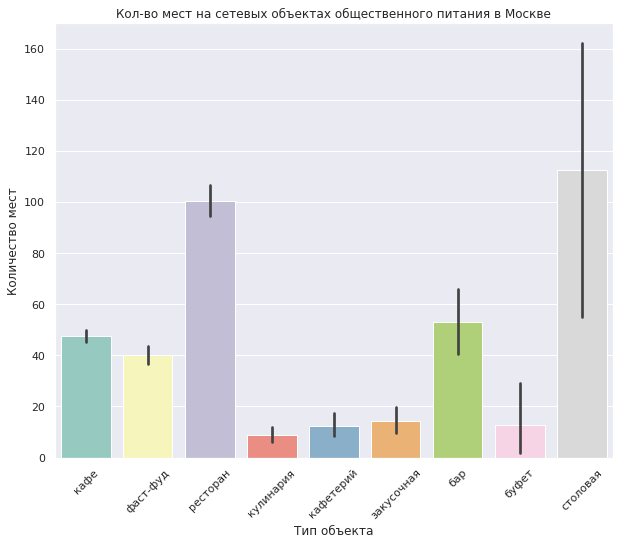

In [35]:
ax = sns.barplot(x='object_type', y='number_of_seats', data=temp, palette="Set3")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на сетевых объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

***По сетевым объектам общественного питания:***

- У столовой по средним показателям больше всего посадочных мест(около 110);
- У ресторанов (около 100);
- У бара (около 55); 
- В остальных объектах меньше 50.

In [36]:
net_s = 'несетевое'

In [37]:
n_temp = df.query('chain == @net_s')

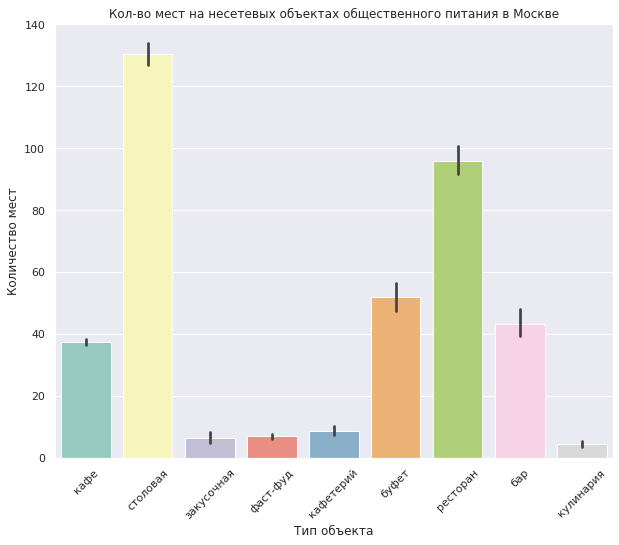

In [38]:
ax = sns.barplot(x='object_type', y='number_of_seats', data=n_temp, palette="Set3")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на несетевых объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

***По несетевым:***

- У столовой по средним показателям больше всего посадочных мест(около 130);
- У ресторанов (около 100);
- У буфета (около 55); 
- В остальных объектах меньше 50.

# Выделим в отдельный столбец информацию об улице.

In [39]:
streets = df['address'].to_list()

In [40]:
streets_only = []
for street in streets:  
    start = street.find('город москва')
    end = street.find('дом')
    streets_only.append(street[start+14:end-2])



In [41]:
df['street_name'] = streets_only

In [42]:
df.head(20)

,id,object_name,chain,object_type,address,number_of_seats,s_chain,street_name
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,NaN,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,NaN,улица Талалихина
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,NaN,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,сетевое,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,NaN,Абрамцевская улица
5,27429,стол. при гоу сош № 1051,несетевое,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,NaN,Абрамцевская улица
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,сетевое,переулок Сивцев Вражек
7,20957,буфет мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,NaN,Авиамоторная улица
8,20958,кпф семья-1,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,NaN,Авиамоторная улица
9,28858,столовая мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,NaN,Авиамоторная улица


# Построим график топ-10 улиц по количеству объектов общественного питания.

In [43]:

from io import BytesIO
import requests
spreadsheet_id = '1JwlIrvyffUzG_COoiEchSPvWJN1-Qzvg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df1 = pd.read_csv(BytesIO(r.content))
df1

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19323,00360625,Вкусно - и точка,2375986579,да,Вкусно - и точка,предприятие быстрого обслуживания,Южный административный округ,район Чертаново Южное,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(926) 154-79-58\n\n,70,нет,37.5992779999999980,55.5839327078369080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19324,00360730,Суши Wok,2375986582,да,Суши Wok,предприятие быстрого обслуживания,Западный административный округ,район Фили-Давыдково,"город Москва, Малая Филёвская улица, дом 18",PublicPhone:(916) 219-08-03\n\n,14,нет,37.4673549999999980,55.7371487519438490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19325,00361108,Сушисет,2375986598,да,Суши Сет,кафе,Западный административный округ,район Солнцево,"город Москва, Боровское шоссе, дом 2А, корпус 3",PublicPhone:нет телефона\n\n,0,нет,37.4113290000000020,55.6608297298979270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19326,00360469,Cofix,2375986632,да,Cofix,кафетерий,Северный административный округ,Войковский район,"город Москва, Ленинградское шоссе, дом 16А, ст...",PublicPhone:нет телефона\n\n,8,нет,37.4972020000000010,55.8234127770431460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df1 = df1.rename(columns={'Address':'address', 'District': 'district'})

In [45]:
df3 = df.merge(df1, on='address', how='right')
df3

,id,object_name,chain,object_type,address,number_of_seats,s_chain,street_name,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,district,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,NaN,NaN,NaN,NaN,Адрес,NaN,NaN,NaN,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,"151,635.00",сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48.00,NaN,улица Егора Абакумова,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"77,874.00",родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.00,NaN,улица Талалихина,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,"Российская Федерация, город Москва, внутригоро...",NaN,NaN,NaN,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"город Москва, Угличская улица, дом 17",NaN,NaN,NaN,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70803,"218,391.00",чайхона урюк,несетевое,ресторан,"город Москва, Ленинградское шоссе, дом 16А, ст...",48.00,NaN,Ленинградское шоссе,00360469,Cofix,2375986632,да,Cofix,кафетерий,Северный административный округ,Войковский район,PublicPhone:нет телефона\n\n,8,нет,37.4972020000000010,55.8234127770431460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70804,"218,393.00",швили,несетевое,кафе,"город Москва, Ленинградское шоссе, дом 16А, ст...",30.00,NaN,Ленинградское шоссе,00360469,Cofix,2375986632,да,Cofix,кафетерий,Северный административный округ,Войковский район,PublicPhone:нет телефона\n\n,8,нет,37.4972020000000010,55.8234127770431460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70805,"218,385.00",coffee moments,несетевое,кафетерий,"город Москва, Ленинградское шоссе, дом 16А, ст...",0.00,NaN,Ленинградское шоссе,00360469,Cofix,2375986632,да,Cofix,кафетерий,Северный административный округ,Войковский район,PublicPhone:нет телефона\n\n,8,нет,37.4972020000000010,55.8234127770431460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70806,"218,394.00",cofix,сетевое,кафетерий,"город Москва, Ленинградское шоссе, дом 16А, ст...",0.00,сетевое,Ленинградское шоссе,00360469,Cofix,2375986632,да,Cofix,кафетерий,Северный административный округ,Войковский район,PublicPhone:нет телефона\n\n,8,нет,37.4972020000000010,55.8234127770431460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
temp = df.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])
temp

,street_name,id,object_name,chain,object_type,address,number_of_seats,s_chain
0,проспект Мира,204,204,204,204,204,204,57
1,Профсоюзная улица,182,182,182,182,182,182,52
2,Ленинградский проспект,170,170,170,170,170,170,55
3,Пресненская набережная,167,167,167,167,167,167,25
4,Варшавское шоссе,155,155,155,155,155,155,42
5,Ленинский проспект,147,147,147,147,147,147,30
6,проспект Вернадского,131,131,131,131,131,131,37
7,Кутузовский проспект,114,114,114,114,114,114,24
8,Каширское шоссе,103,103,103,103,103,103,22
9,Кировоградская улица,102,102,102,102,102,102,39


***Больше всего объектов общественного питания находится на Проспекте мира(204), затем Профсоюзная улица(182), Ленинградский проспект(170), Пресненская набережная(167), Варшавское шоссе(155), Ленинский проспект(147), проспект Вернадского(131), Кутузовский проспект(114), Каширское шоссе(103), Кировоградская улица(102)***

In [47]:
tem = df3.groupby('AdmArea').count().sort_values(by='street_name', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])
tem

,AdmArea,id,object_name,chain,object_type,address,number_of_seats,s_chain,street_name,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,district,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Центральный административный округ,13151,13151,13151,13151,15700,13151,3089,13151,15700,15700,15700,15700,3539,15700,15700,15700,15700,15700,15700,15700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Южный административный округ,13149,13149,13149,13149,14069,13149,3255,13149,14069,14069,14069,14069,3504,14069,14069,14069,14069,14069,14069,14069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Северный административный округ,7832,7832,7832,7832,8550,7832,2491,7832,8550,8550,8550,8550,2333,8550,8550,8550,8550,8550,8550,8550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Западный административный округ,7803,7803,7803,7803,8604,7803,2697,7803,8604,8604,8604,8604,2990,8604,8604,8604,8604,8604,8604,8604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Северо-Восточный административный округ,6484,6484,6484,6484,7363,6484,2134,6484,7363,7363,7363,7363,1916,7363,7363,7363,7363,7363,7363,7363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Юго-Западный административный округ,3760,3760,3760,3760,4455,3760,1222,3760,4455,4455,4455,4455,1410,4455,4455,4455,4455,4455,4455,4455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Юго-Восточный административный округ,3051,3051,3051,3051,3679,3051,1103,3051,3679,3679,3679,3679,1036,3679,3679,3679,3679,3679,3679,3679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Северо-Западный административный округ,2776,2776,2776,2776,3084,2776,1142,2776,3084,3084,3084,3084,1096,3084,3084,3084,3084,3084,3084,3084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Восточный административный округ,1524,1524,1524,1524,2369,1524,429,1524,2369,2369,2369,2369,653,2369,2369,2369,2369,2369,2369,2369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Новомосковский административный округ,1188,1188,1188,1188,1765,1188,447,1188,1765,1765,1765,1765,489,1765,1765,1765,1765,1765,1765,1765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***Больше всего улиц с наибольшим числов объектов общественного питания находится в центральном административном округе(13151) и в южном административном округе(13149)***

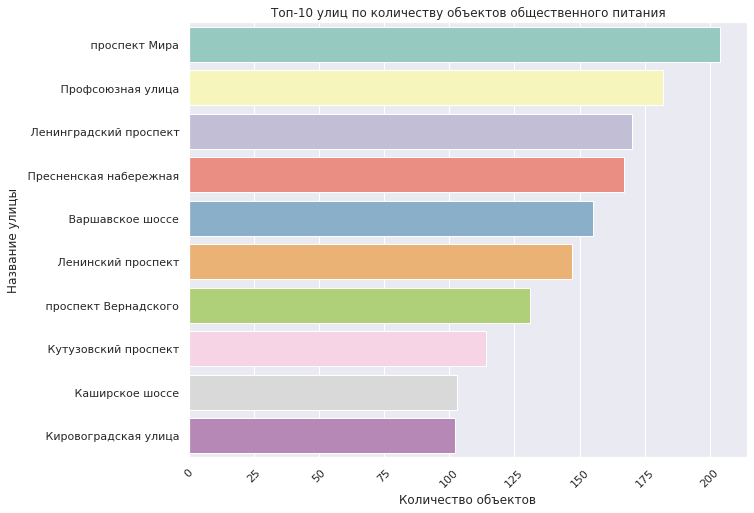

In [48]:
ax = sns.barplot(x='object_type', y='street_name', data=temp, palette="Set3")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation=45)
plt.show()

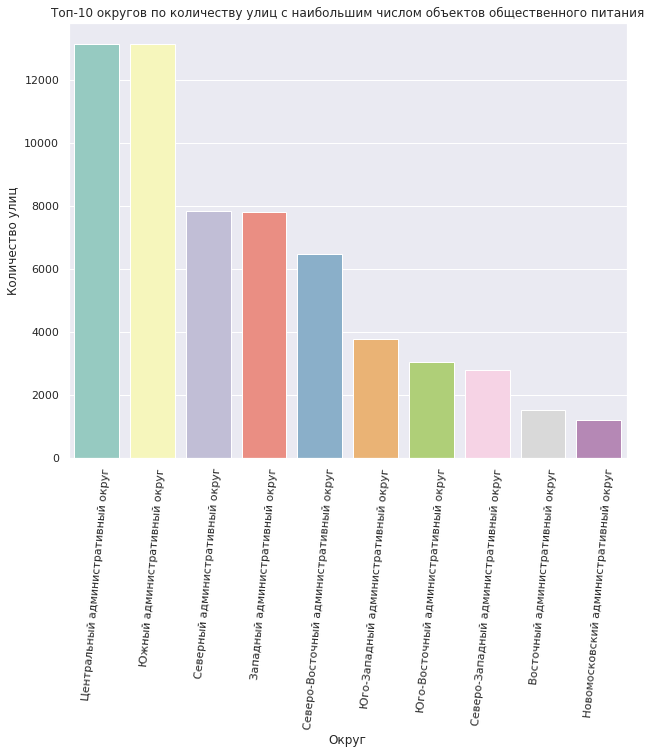

In [49]:
ax = sns.barplot(x='AdmArea', y='street_name', data=tem, palette="Set3")
ax.set_xlabel('Округ')
ax.set_ylabel('Количество улиц')
ax.set_title('Топ-10 округов по количеству улиц с наибольшим числом объектов общественного питания')
plt.xticks(rotation=85)
plt.show()

***Посмотрим на распределение посадочных мест для улиц с большим количеством объектов общественного питания.***

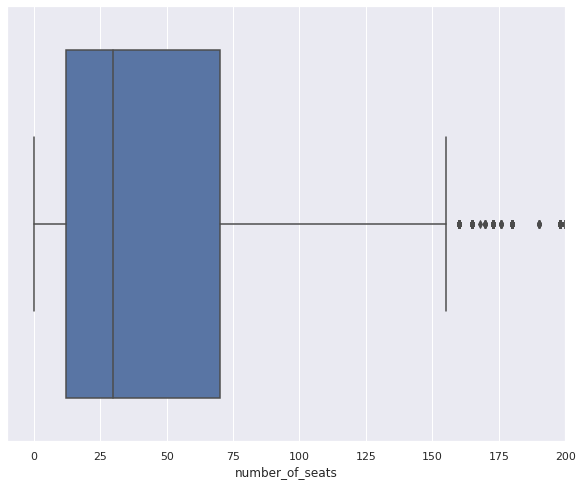

In [50]:
temp = df3[df3["street_name"].isin(top_10)]
ax = sns.boxplot(x=temp['number_of_seats'])
ax.set_xlim(-10,200)
plt.show()

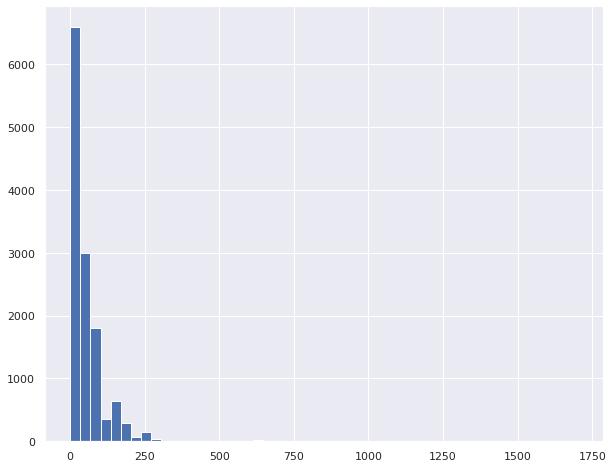

In [51]:
temp['number_of_seats'].hist(bins=50)
plt.show()

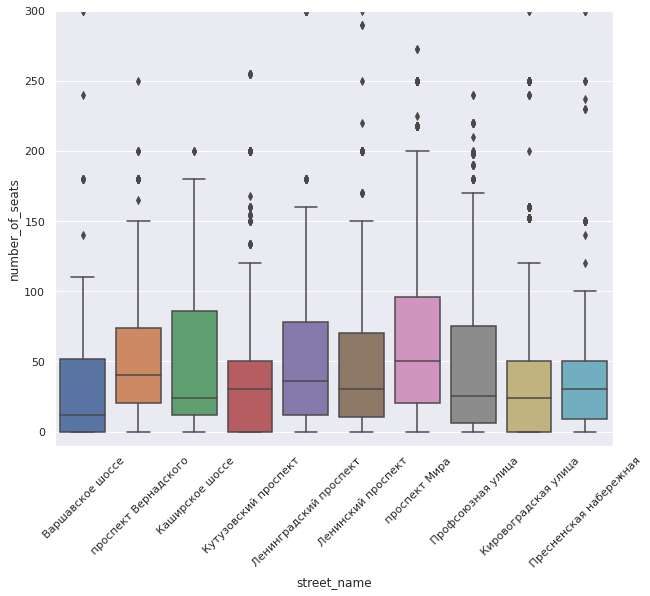

In [52]:
ax = sns.boxplot(x="street_name", y="number_of_seats", data=temp, orient='v')
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
plt.show()

In [53]:
temp['number_of_seats'].describe()

count   12,977.00
mean        51.90
std         67.97
min          0.00
25%         12.00
50%         30.00
75%         70.00
max      1,700.00
Name: number_of_seats, dtype: float64

 ***В основном все находятся вдоль проспектов и шоссе, количество посадочных мест существенно не отличается.Из-за расположения квадратура дорогая, помещения не большие, посадочных мест не много***

 # Найдем число улиц с одним объектом общественного питания.
 

In [54]:
temp = df3.groupby('street_name').count()
len(temp.query('object_name == 1'))

559

In [55]:
temp = temp.query('object_name == 1')
temp = temp.reset_index()

In [56]:
deadloss = list(temp['street_name'])

In [57]:
deadloss = df3[df3['street_name'].isin(deadloss)]

In [58]:
deadloss.groupby('street_name')['object_name'].value_counts()

street_name                   object_name                                          
 1-й Балтийский переулок      хуанхэ                                                   1
 1-й Басманный переулок       столовая института мировых цивилизаций                   1
 1-й Ботанический проезд      буфет при гуп «объединенный комбинат школьно питания»    1
 1-й Голутвинский переулок    шелби                                                    1
 1-й Котельнический переулок  школа 2104                                               1
                                                                                      ..
улок                          кафе «skuratov»                                          1
ховская улица                 блэк стоун                                               1
ца                            тцсо чертаново «кдп»                                     1
шоссе                         лукойл-центрнефтьпродукт                                 1
юбова                     

In [59]:
deadloss.head(10)

,id,object_name,chain,object_type,address,number_of_seats,s_chain,street_name,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,district,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,"151,635.00",сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48.00,NaN,улица Егора Абакумова,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,"153,644.00",американская лаборатория десертов,несетевое,кафе,"город Москва, Филипповский переулок, дом 15/5",20.00,NaN,Филипповский переулок,00153644,I love cake,637377268,нет,NaN,кафе,Центральный административный округ,район Арбат,PublicPhone:(985) 226-02-38\n\n,20,нет,37.5983536181482950,55.7505906758320860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,"21,065.00",буфет при астраханских банях,несетевое,буфет,"город Москва, Астраханский переулок, дом 5/9",3.00,NaN,Астраханский переулок,000021065,Буфет при Астраханских банях,637379209,нет,NaN,буфет,Центральный административный округ,Мещанский район,PublicPhone:(495) 344-11-68\n\n,3,нет,37.6395778992853070,55.7788813376081120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,"25,833.00",азербайджан,несетевое,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180.00,NaN,улица Демьяна Бедного,000025833,АЗЕРБАЙДЖАН,637380255,нет,NaN,ресторан,Северо-Западный административный округ,район Хорошёво-Мнёвники,PublicPhone:(495) 946-34-30\n\n,180,нет,37.4869140611715000,55.7698304856012000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,"24,606.00",радэа,несетевое,кафе,"город Москва, Нахимовский проспект, владение 75А",7.00,NaN,"Нахимовский проспект, владение",000024606,Радэа,637383223,нет,NaN,кафе,Юго-Западный административный округ,Ломоносовский район,PublicPhone:(499) 135-33-16\n\n,7,нет,37.5527200380452370,55.6834539420314480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,"158,148.00",кофе «кофе собой»,несетевое,кафе,"город Москва, Васильевская улица, дом 2, корпус 1",10.00,NaN,Васильевская улица,00158148,Bollo Городская кофейня,637383901,нет,NaN,кафе,Центральный административный округ,Пресненский район,PublicPhone:(495) 773-23-53\n\n,10,нет,37.5857727006965310,55.7698375543479730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,"24,646.00",угол,несетевое,кафе,"город Москва, Верхняя улица, дом 3, корпус 2",71.00,NaN,Верхняя улица,000024646,Угол,637384849,нет,NaN,кафе,Северный административный округ,район Беговой,PublicPhone:(499) 257-04-63\n\n,26,нет,37.5749800416635000,55.7766235021973000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,"20,632.00",бар в фитнес клубе,несетевое,бар,"город Москва, Глазовский переулок, дом 5",4.00,NaN,Глазовский переулок,000020632,БАР В ФИТНЕС КЛУБЕ,637384902,нет,NaN,бар,Центральный административный округ,район Хамовники,PublicPhone:(499) 795-13-18\n\n,4,нет,37.5874647117225000,55.7437860579185000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,"23,169.00",марина,несетевое,кафе,"город Москва, улица Вешних Вод, дом 8, корпус 2",90.00,NaN,улица Вешних Вод,000023169,МАРИНА,637384980,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,PublicPhone:(499) 183-16-66\n\n,90,нет,37.6997853853092000,55.8595184059192000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,"25,487.00",сущевский дворик,несетевое,кафе,"город Москва, 2-й Вышеславцев переулок, дом 17",48.00,NaN,2-й Вышеславцев переулок,000025487,СУЩЕВСКИЙ ДВОРИК,637387331,нет,NaN,кафе,Северо-Восточный административный округ,район Марьина Роща,PublicPhone:(495) 684-29-63\n\n,48,нет,37.606621744

In [60]:
temp = deadloss.groupby('district').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
len(temp.query('object_name == 1'))
temp

,district,id,object_name,chain,object_type,address,number_of_seats,s_chain,street_name,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,ID_en,Name_en,IsNetObject_en,OperatingCompany_en,TypeObject_en,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Таганский район,26,26,26,26,26,26,1,26,26,26,26,26,1,26,26,26,26,26,26,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,район Хамовники,22,22,22,22,22,22,2,22,22,22,22,22,1,22,22,22,22,22,22,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Басманный район,19,19,19,19,19,19,0,19,19,19,19,19,0,19,19,19,19,19,19,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,район Сокольники,14,14,14,14,14,14,1,14,14,14,14,14,0,14,14,14,14,14,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Пресненский район,14,14,14,14,14,14,0,14,14,14,14,14,0,14,14,14,14,14,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Тверской район,14,14,14,14,14,14,2,14,14,14,14,14,2,14,14,14,14,14,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Можайский район,11,11,11,11,11,11,0,11,11,11,11,11,0,11,11,11,11,11,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Мещанский район,11,11,11,11,11,11,0,11,11,11,11,11,0,11,11,11,11,11,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,район Южное Бутово,10,10,10,10,10,10,1,10,10,10,10,10,1,10,10,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Тимирязевский район,10,10,10,10,10,10,0,10,10,10,10,10,0,10,10,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


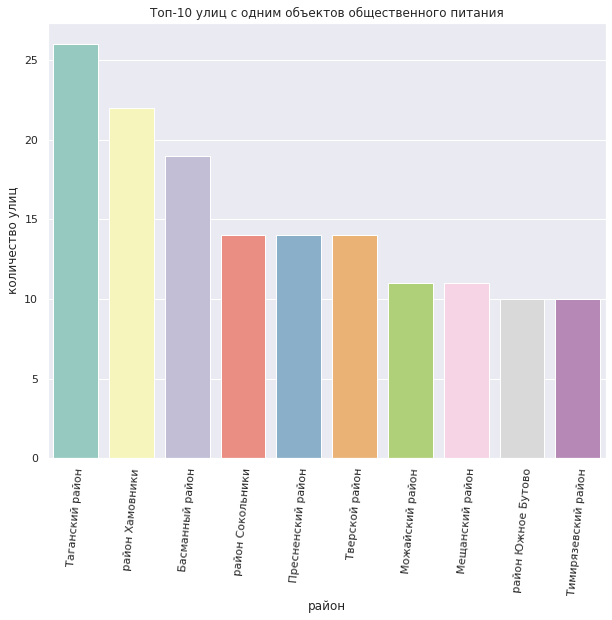

In [61]:
ax = sns.barplot(x='district', y='street_name', data=temp, palette="Set3")
ax.set_xlabel('район')
ax.set_ylabel('количество улиц')
ax.set_title('Топ-10 улиц c одним объектов общественного питания')
plt.xticks(rotation=85)
plt.show()

***Больше всего улиц с одним объектом общественного питания находится в Таганском районе(26), затем идет район Хамовники(22), далее Басманный район(19), район Сокольники(14), Пресненский район(14), Тверской район(14), Можайский район(11), Мещанский район(11), район Южное Бутово(10), Тимирязевский район(10)***

***Улицы с одним заведением на ней(улице),
находятся за 3м кольцом,в основном это не сетевики. В центре мало улиц с одним заведением.***



# Проделаная работа:

- Заменили длинные слова на более короткие,привели к нижнему регистру, проверили на дубликаты и пропуски;

- Исследовали соотношение видов объектов общественного питания по количеству;

- Исследовали соотношение сетевых и несетевых заведений по количеству;

- Выяснили,для какого вида объекта общественного питания характерно сетевое распространение;

- Выяснили, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест;

- Для каждого вида объекта общественного питания описали среднее количество посадочных мест. Выяснили, какой вид предоставляет в среднем самое большое количество посадочных мест;

- Выделили в отдельный столбец информацию об улице;

- Построили график топ-10 улиц по количеству объектов общественного питания;

- Нашли число улиц с одним объектом общественного питания;

# ВЫВОДЫ:



***1.Из видов общественного питания лидирует с большим отрывом - кафе, затем уже идут столовые, рестораны и фаст-фуд.***


***2.Сетевых в разы меньше. В 4 раза***

***3.Больше всего сетевиков из обьектов общественного питания характерны для кафе, их 1396,но доля от общего количества всего 23 процента, доля у фаст-фуда 41 процент и количество их тоже не малое 791, в ресторанах доля сетевых заведений от общего числа состовляет 24 процента. Сетевое распростронение больше всего развито у фаст-фуда.***
 
***4.Среднее количество посадочных мест для объектов общественного питания:*** 
 
- По совместным показателям и сетевым и несетевым:

    - У столовой по средним показателям больше всего посадочных мест(около 130);
    - У ресторанов (около 100);
    - У буфета 50; 
    - В остальных объектах меньше 50.

- По сетевым объектам общественного питания:

    - У столовой по средним показателям больше всего посадочных мест(около 110);
    - У ресторанов (около 100);
    - У бара (около 55); 
    - В остальных объектах меньше 50.

- По несетевым:

    - У столовой по средним показателям больше всего посадочных мест(около 130);
    - У ресторанов (около 100);
    - У буфета (около 55); 
    - В остальных объектах меньше 50.

***5.В основном все находятся вдоль проспектов и шоссе, количество посадочных мест существенно не отличается.Из-за расположения квадратура дорогая, помещения не большие, посадочных мест не много***

***6.Больше всего улиц с одним объектом общественного питания находится в Таганском районе(26), затем идет район Хамовники(22), далее Басманный район(19), район Сокольники(14), Пресненский район(14), Тверской район(14), Можайский район(11), Мещанский район(11), район Южное Бутово(10), Тимирязевский район(10)***


***7.Лучше всего открыть кафе c посадкой до 40 мест, либо фаст-фуд с посадкой около 20 мест , на проспектах либо шоссе (Проспект Мира,Ленинградский проспект,Профсоюзная улица,Пресненская набережная). Входить в сетевые объекты общественного питания не нужно.***



Презентация: <https://cloud.mail.ru/public/Js3w/veZq2Wp3J>
